In [76]:
library(CausalImpact)
library(ggplot2)
library(missForest)
library(zoo)
library(gridExtra)
library(xts)
require("reticulate")
source_python("pickle_reader.py")

t <- seq.Date(as.Date("1984-07-01"), by = "years", length.out = 30)

## Read the ndvi data output from python


In [77]:
ndvi_1994_data <- read_pickle_file("../manuscript/outputs/disturbed_ndvi_1994")

In [79]:
length(ndvi_1994_data)

[1] 638

## Implement the CI model on all pixels

**Note:** We perform the CI analyses in two different ways

1- On all pixels then we take the mean of results (only to respond to the reviews)

2- Take the mean of NDVIs then implement the CI (for publication)


### First perform on all pixels (takes ~20 minutes)


In [80]:
set.seed(123)
results_ndvi=matrix(,nrow=length(ndvi_1994_data),ncol=5)

pred_ndvi=matrix(NA,nrow = 30,ncol = length(ndvi_1994_data))
response_ndvi=matrix(NA,nrow = 30,ncol = length(ndvi_1994_data))
point.effect_ndvi=matrix(NA,nrow = 30,ncol = length(ndvi_1994_data))
point.effect.lower_ndvi=matrix(NA,nrow = 30,ncol = length(ndvi_1994_data))
point.effect.upper_ndvi=matrix(NA,nrow = 30,ncol = length(ndvi_1994_data))
pred.lower_ndvi=matrix(NA,nrow = 30,ncol = length(ndvi_1994_data))
pred.upper_ndvi=matrix(NA,nrow = 30,ncol = length(ndvi_1994_data))

y_ndvi=matrix(NA,nrow=30,ncol=length(ndvi_1994_data))
X_ndvi=matrix(NA,nrow=30,ncol=length(ndvi_1994_data))

for(k in 1:length(ndvi_1994_data)){
   
    flush.console()
    tryCatch({
        data=ndvi_1994_data[k]
        data<-matrix(unlist(data),nrow=30)
        # all_columns_na <- apply(data, 1, function(row) all(is.na(row)))
        # t_na_rm = t[all_columns_na==FALSE]
        # data_na_rm = data[all_columns_na==FALSE,]
        imputed_data<-missForest(data)
        imputed_data<-imputed_data[1]$ximp

        # data_ts <- zoo(imputed_data, t)
        # ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
        y_ndvi[,k] <- imputed_data[,1]
        X_ndvi[,k] = rowMeans(imputed_data[,2:dim(imputed_data)[2]],1)
        data_ts_ave = zoo(cbind(y_ndvi[,k],X_ndvi[,k]),t)
        pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
        post.period <- as.Date(c("1994-07-01", "2013-07-01"))
        impact <- CausalImpact(data_ts_ave, pre.period, post.period)
        # impact2 <- CausalImpact(data_ts, pre.period, post.period)

        results_ndvi[k,1] = impact$summary$Actual[1]
        results_ndvi[k,2] = impact$summary$Pred[1]
        results_ndvi[k,3] = impact$summary$AbsEffect[1]
        results_ndvi[k,4] = impact$summary$RelEffect[1]
        results_ndvi[k,5] = impact$summary$p[1]
        infer <- impact$series
        pred_ndvi[,k] <- infer$point.pred
        response_ndvi[,k] <- infer$response
        point.effect_ndvi[,k] <- infer$point.effect 
        point.effect.lower_ndvi[,k] <- infer$point.effect.lower
        point.effect.upper_ndvi[,k] <- infer$point.effect.upper
        pred.lower_ndvi[,k] <- infer$point.pred.lower
        pred.upper_ndvi[,k] <- infer$point.pred.upper

        print(k)
        },
        
        
    error=function(err){return(NA)})
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry

[1] 204


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry

[1] 208
[1] 210
[1] 211
[1] 212
[1] 213
[1] 214


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 216


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 218


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 221
[1] 222
[1] 223
[1] 224
[1] 225
[1] 226
[1] 227
[1] 228
[1] 229
[1] 230
[1] 231
[1] 232
[1] 233
[1] 234
[1] 235
[1] 236
[1] 237
[1] 238
[1] 239
[1] 240
[1] 241
[1] 242
[1] 243
[1] 244
[1] 245
[1] 246
[1] 247
[1] 248
[1] 249
[1] 250
[1] 251
[1] 252
[1] 253
[1] 254
[1] 255
[1] 256
[1] 257
[1] 258
[1] 259
[1] 260
[1] 261
[1] 262
[1] 263
[1] 264
[1] 265
[1] 266
[1] 267
[1] 268
[1] 269
[1] 270
[1] 271
[1] 272
[1] 273
[1] 274
[1] 275
[1] 276
[1] 277
[1] 278
[1] 279
[1] 280
[1] 281
[1] 282
[1] 283
[1] 284
[1] 285
[1] 286
[1] 287
[1] 288
[1] 289
[1] 290
[1] 291
[1] 292
[1] 293
[1] 294
[1] 295
[1] 296
[1] 297
[1] 298
[1] 299
[1] 300
[1] 301
[1] 302
[1] 303
[1] 304
[1] 305
[1] 306
[1] 307
[1] 308
[1] 309
[1] 310
[1] 311
[1] 312
[1] 313
[1] 314
[1] 315
[1] 316
[1] 317
[1] 318
[1] 319
[1] 320
[1] 321
[1] 322
[1] 323
[1] 324
[1] 325
[1] 326
[1] 327
[1] 328
[1] 329
[1] 330
[1] 331
[1] 332
[1] 333
[1] 334
[1] 335
[1] 336
[1] 337
[1] 338
[1] 339
[1] 340
[1] 341
[1] 342
[1] 343
[1] 344
[1] 345


Take the mean of all NDVIs for the step which is implementing CI


In [81]:
# Take the mean of NDVI for all pixels
y_mean_ndvi <- rowMeans(y_ndvi, na.rm = TRUE)
X_mean_ndvi <- rowMeans(X_ndvi, na.rm = TRUE)
y_std_ndvi <- apply(y_ndvi, 1, sd, na.rm = TRUE)
# Calculate the standard error of the mean
sem_ndvi <- y_std_ndvi / sqrt(nrow(y_ndvi))
# Calculate the upper and lower bounds of
upper_bound <- y_mean_ndvi + sem_ndvi
lower_bound <- y_mean_ndvi - sem_ndvi
data_mean_ndvi <- zoo(cbind(y_mean_ndvi, X_mean_ndvi), t)

Save the results


In [44]:
save(
    results_ndvi,
    y_ndvi,
    X_ndvi,
    data_mean_ndvi,
    pred_ndvi,
    response_ndvi,
    point.effect_ndvi,
    point.effect.lower_ndvi,
    point.effect.upper_ndvi,
    pred.lower_ndvi,
    pred.upper_ndvi,
    file = "../manuscript/outputs/ci_results_data.RData"
)


Implement CI on the mean values


In [ ]:
load("../manuscript/outputs/ci_results_data.RData")

In [83]:
set.seed(1)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
ci <- CausalImpact(data_mean_ndvi, pre.period, post.period)

Get the results


In [87]:
infer <- ci$series
pred <- infer$point.pred
response <- infer$response
point.effect <- infer$point.effect 
point.effect.lower <- infer$point.effect.lower
point.effect.upper <- infer$point.effect.upper
pred.lower <- infer$point.pred.lower
pred.upper <- infer$point.pred.upper

# Save all variables
save(
    infer,
    pred,
    response,
    point.effect,
    point.effect.lower,
    point.effect.upper,
    pred.lower,
    pred.upper,
    file = "../manuscript/outputs/ci_aggregated.RData"
)
data = data.frame(pred,pred.lower,pred.upper)

# Plotting


In [13]:
load("variables.RData")

First plot the results from the CI for the mean (publication version)


Don't know how to automatically pick scale for object of type <zoo>. Defaulting
to continuous.


Don't know how to automatically pick scale for object of type <zoo>. Defaulting
to continuous.


TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

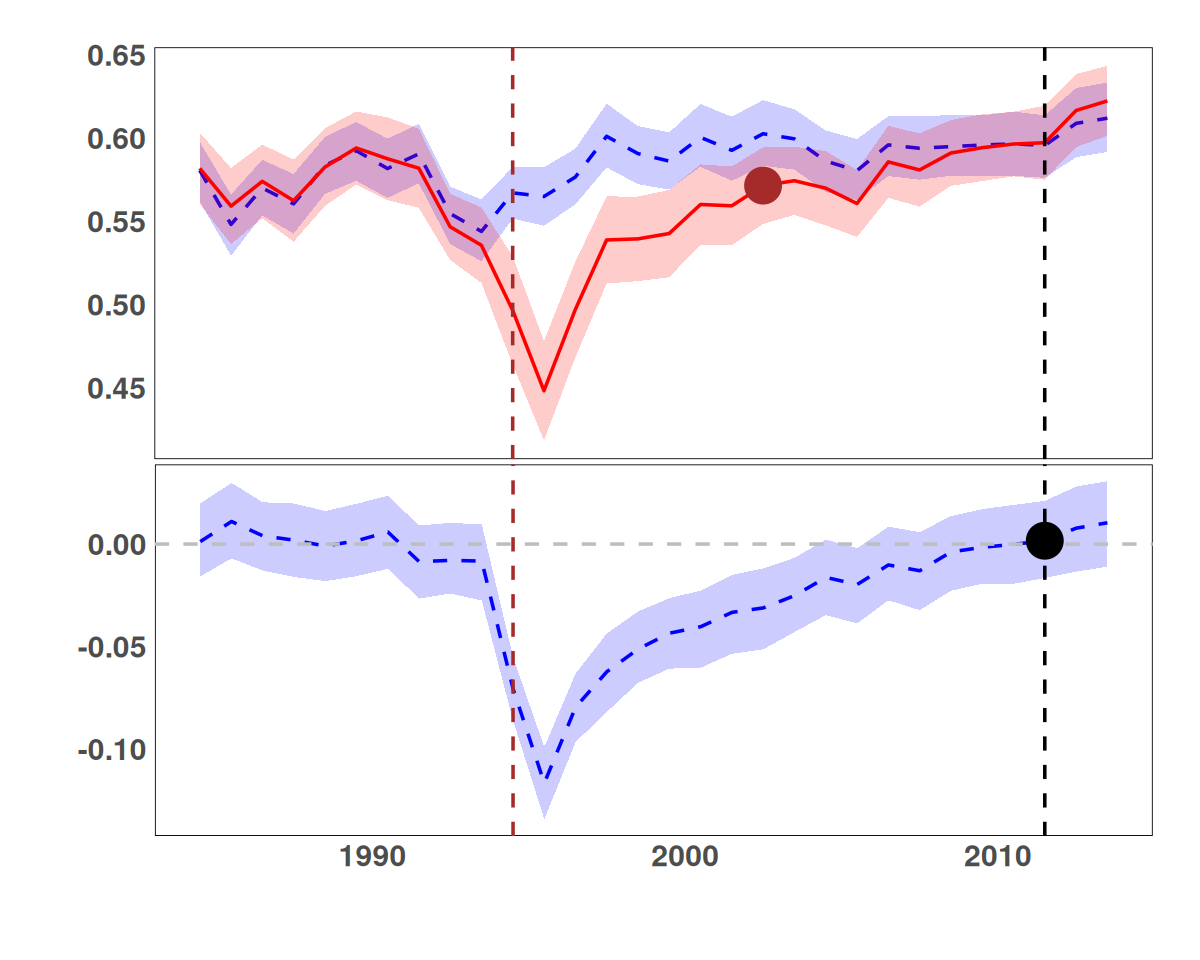

In [86]:
options(
  repr.plot.width = 10,     # Width of the plot
  repr.plot.height = 8    # Height of the plot
)
gg1 <- ggplot() +
  geom_line(aes(x = t, y = pred, color = "Prediction"), size = 1, linetype = "dashed") +
  geom_ribbon(aes(x = t, ymin = pred.lower, ymax = pred.upper, fill = "Prediction"), alpha = 0.2) +
  geom_line(aes(x = t, y = response, color = "Actual"), size = 1) +
  geom_ribbon(aes(x = t, ymin = lower_bound, ymax = upper_bound,fill="Actual"), alpha = 0.2) +
  labs(
    x = "",
    y = ""
  ) +
  scale_color_manual(
    values = c("Prediction" = "blue", "Actual" = "red"),
    labels = c("",""),

  ) +
  scale_fill_manual(
    values = c("Prediction" = "blue","Actual" = "red"),
    guide = FALSE
  ) +  
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = NA),
    # panel.background = element_rect(fill = "white"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text = element_text(size = 18,face="bold"),        # Font size for tick labels
    axis.text.x = element_blank(),
    axis.title = element_text(size = 22),
    legend.position = "none",  # Move the legend to the bottom
    legend.background = element_rect(fill = "white", color = "black"),  # Legend background color and border
    legend.box = "horizontal",  # Arrange legend items horizontally,
    legend.text = element_text(size = 16,face="bold"),
    legend.title = element_blank(),
    plot.margin=unit(c(1,1,-0.5,1), "cm")
  ) 
  gg1 = gg1+theme(legend.background = element_blank())
  gg1 <- gg1 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1) +
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1) +
  geom_segment(
    # aes(x = as.Date("1988-07-01"), xend = as.Date("1994-07-01"), y = .47, yend = .56),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) +
  # annotate("text", x = as.Date("1987-07-01"), y = .45, label = "Distrubance(1994)", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7,face="bold")+
  geom_segment(
  # aes(x = as.Date("2003-07-01"), xend = as.Date("2002-07-01"), y = .51, yend = response[19]-0.01),
  arrow = arrow(type = "closed", length = unit(0.2, "inches")),
  lineend = "butt",
  color = "black"
  ) 
  # annotate("text", x = as.Date("2004-07-01"), y = .45, label = "Recovered to mean NDVI\n before disturbance (2002) ", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7)

  gg1 = gg1+geom_point(aes(x = as.Date("2002-07-01"), y = response[19]),color = "brown",
  show.legend = FALSE, size = 8,stroke=2)
   

gg2 <- ggplot() +
  geom_line(aes(x=t,y = point.effect), color = "blue", size = 1,linetype="dashed") +
  geom_ribbon(aes(t,ymin=point.effect.lower,ymax=point.effect.upper),fill="blue",alpha=0.2)+
  # geom_line(aes(x=t,y = response), color = "red", size = 1) +
  labs(
    x = "",
    y = ""
  ) + theme_minimal() + theme(panel.background = element_rect(fill = "white"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
  , axis.text = element_text(size = 18,face = "bold"),        # Font size for tick labels
    axis.title = element_text(size = 22),plot.margin=unit(c(-.33,1,1,.8), "cm") )  # Remove gridlines
gg2 <- gg2 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1)+
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1)+
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray",size=1) + geom_point(aes(x = as.Date("2011-07-01"), y = point.effect[28]),color = "black",
  show.legend = FALSE, size = 8,stroke=2) +
  geom_segment(
    # aes(x = as.Date("2005-07-01"), xend = as.Date("2011-05-01"), y = -0.1, yend = -.003),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) 
  # annotate("text", x = as.Date("2004-05-2"), y = -.16, label = "Recovered to counterfactual\n state(2011)", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7)


combined_plot <- grid.arrange(gg1, gg2, nrow = 2)
combined_plot
ggsave("../manuscript/figures/recovery.png", plot = combined_plot,width = 10, height = 8, dpi = 300)

In [57]:
index <- which(results_ndvi[, 5] < 0.01)
# Assuming 'response', 'pred', and 'point_effect' are vectors of the same length
response = rowMeans(response_ndvi[,index])
pred = rowMeans(pred_ndvi[,index])
point_effect = rowMeans(point.effect_ndvi[,index])
point.effect.lower = rowMeans(point.effect.lower_ndvi[,index])
point.effect.upper = rowMeans(point.effect.upper_ndvi[,index])
# df <- data.frame(t=t,response = rowMeans(response_ndvi[,index]), pred = rowMeans(pred_ndvi[,index]), point_effect = rowMeans(point.effect_ndvi[,index]))

# # Create the top subplot
# p1 <- ggplot(df, aes(x = t)) +
#   geom_line(aes(y = response), color = "blue") +
#   geom_line(aes(y = pred), color = "red") +
#   labs(y = "Response / Pred")

# # Create the lower subplot
# p2 <- ggplot(df, aes(x = t)) +
#   geom_line(aes(y = point_effect)) +
#   labs(y = "Point Effect")

# # Combine the two plots
# grid.arrange(p1, p2, ncol = 1)

In [56]:
length(index)

[1] 389

In [16]:
infer <- ci$series
pred <- infer$point.pred
response <- infer$response
point.effect <- infer$point.effect 
point.effect.lower <- infer$point.effect.lower
point.effect.upper <- infer$point.effect.upper
pred.lower <- infer$point.pred.lower
pred.upper <- infer$point.pred.upper
data = data.frame(pred,pred.lower,pred.upper)

ERROR: Error in eval(expr, envir, enclos): object 'ci' not found


Don't know how to automatically pick scale for object of type <zoo>. Defaulting
to continuous.


TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

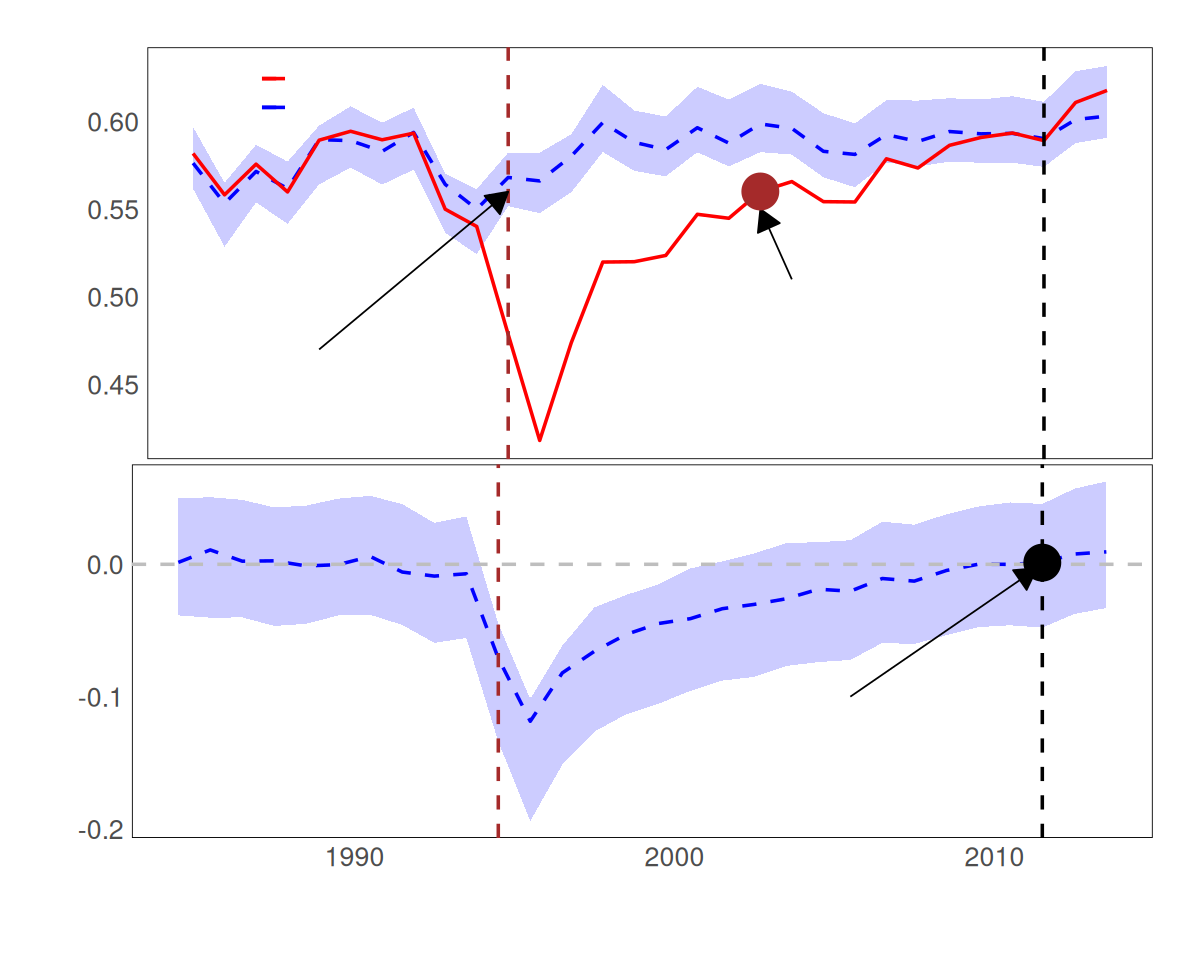

In [58]:
options(
  repr.plot.width = 10,     # Width of the plot
  repr.plot.height = 8    # Height of the plot
)
gg1 <- ggplot() +
  geom_line(aes(x = t, y = pred, color = "Prediction"), size = 1, linetype = "dashed") +
  geom_ribbon(aes(x = t, ymin = pred.lower, ymax = pred.upper, fill = "Prediction"), alpha = 0.2) +
  geom_line(aes(x = t, y = response, color = "Actual"), size = 1) +
  labs(
    x = "",
    y = ""
  ) +
  scale_color_manual(
    values = c("Prediction" = "blue", "Actual" = "red"),
    labels = c("",""),

  ) +
  scale_fill_manual(
    values = c("Prediction" = "blue"),
    guide = FALSE
  ) +
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = NA),
    # panel.background = element_rect(fill = "white"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text = element_text(size = 16),        # Font size for tick labels
    axis.text.x = element_blank(),
    axis.title = element_text(size = 22),
    legend.position = c(.13,.90),  # Move the legend to the bottom
    legend.background = element_rect(fill = "white", color = "black"),  # Legend background color and border
    legend.box = "horizontal",  # Arrange legend items horizontally,
    legend.text = element_text(size = 16,face="bold"),
    legend.title = element_blank(),
    plot.margin=unit(c(1,1,-0.5,1), "cm")
  ) 
  gg1 = gg1+theme(legend.background = element_blank())
  gg1 <- gg1 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1) +
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1) +
  geom_segment(
    aes(x = as.Date("1988-07-01"), xend = as.Date("1994-07-01"), y = .47, yend = .56),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) +
  # annotate("text", x = as.Date("1987-07-01"), y = .45, label = "Distrubance(1994)", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7,face="bold")+
  geom_segment(
  aes(x = as.Date("2003-07-01"), xend = as.Date("2002-07-01"), y = .51, yend = response[19]-0.01),
  arrow = arrow(type = "closed", length = unit(0.2, "inches")),
  lineend = "butt",
  color = "black"
  ) 
  # annotate("text", x = as.Date("2004-07-01"), y = .45, label = "Recovered to mean NDVI\n before disturbance (2002) ", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7)

  gg1 = gg1+geom_point(aes(x = as.Date("2002-07-01"), y = response[19]),color = "brown",
  show.legend = FALSE, size = 8,stroke=2)
   

gg2 <- ggplot() +
  geom_line(aes(x=t,y = point.effect), color = "blue", size = 1,linetype="dashed") +
  geom_ribbon(aes(t,ymin=point.effect.lower,ymax=point.effect.upper),fill="blue",alpha=0.2)+
  # geom_line(aes(x=t,y = response), color = "red", size = 1) +
  labs(
    x = "",
    y = ""
  ) + theme_minimal() + theme(panel.background = element_rect(fill = "white"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
  , axis.text = element_text(size = 16),        # Font size for tick labels
    axis.title = element_text(size = 22),plot.margin=unit(c(-.33,1,1,.8), "cm") )  # Remove gridlines
gg2 <- gg2 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1)+
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1)+
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray",size=1) + geom_point(aes(x = as.Date("2011-07-01"), y = point.effect[28]),color = "black",
  show.legend = FALSE, size = 8,stroke=2) +
  geom_segment(
    aes(x = as.Date("2005-07-01"), xend = as.Date("2011-05-01"), y = -0.1, yend = -.003),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) 
  # annotate("text", x = as.Date("2004-05-2"), y = -.16, label = "Recovered to counterfactual\n state(2011)", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7)


combined_plot <- grid.arrange(gg1, gg2, nrow = 2)
combined_plot
# ggsave("../manuscript/figures/recovery.png", plot = combined_plot,width = 10, height = 8, dpi = 300)

Don't know how to automatically pick scale for object of type <zoo>. Defaulting
to continuous.


TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

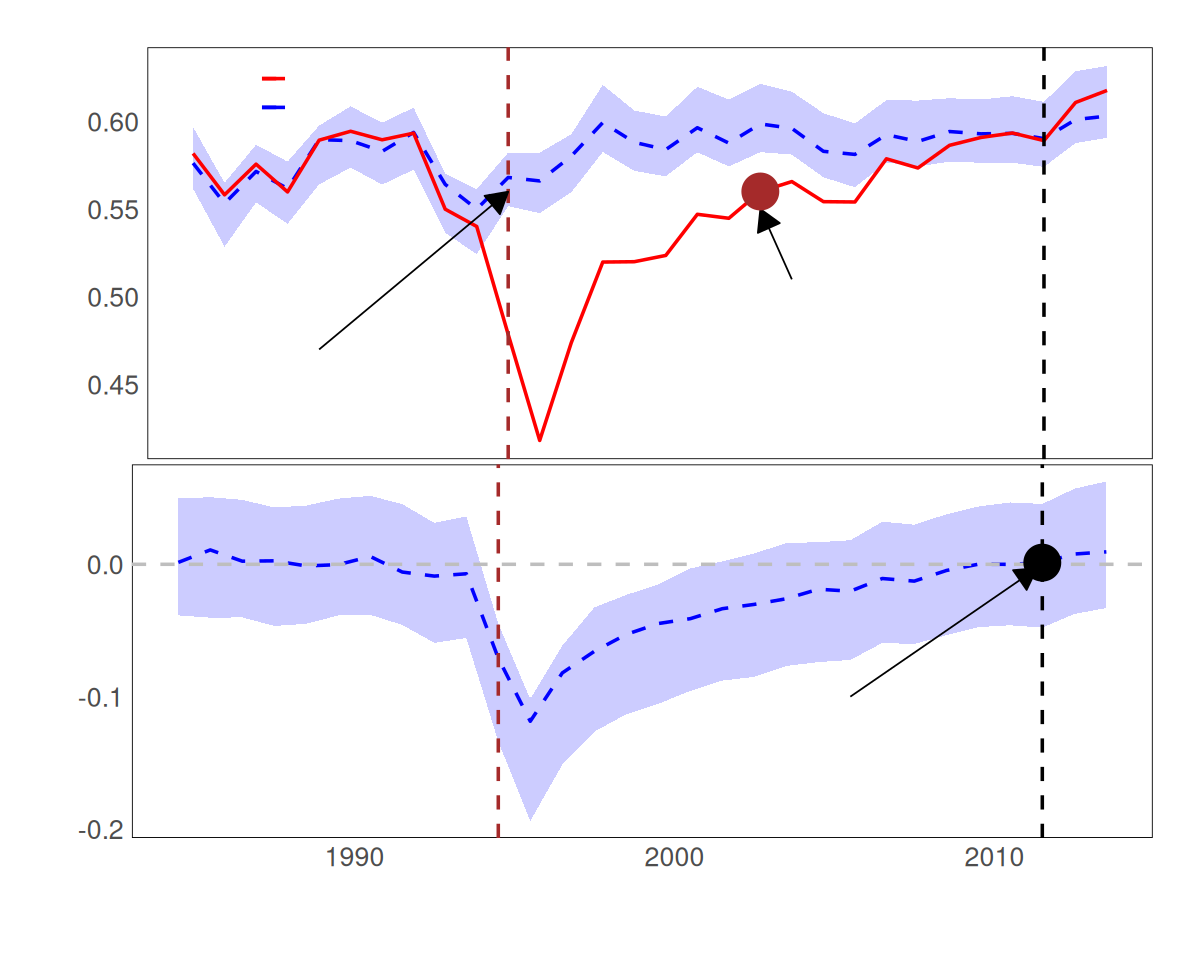

In [59]:
options(
  repr.plot.width = 10,     # Width of the plot
  repr.plot.height = 8    # Height of the plot
)
gg1 <- ggplot() +
  geom_line(aes(x = t, y = pred, color = "Prediction"), size = 1, linetype = "dashed") +
  geom_ribbon(aes(x = t, ymin = pred.lower, ymax = pred.upper, fill = "Prediction"), alpha = 0.2) +
  geom_line(aes(x = t, y = response, color = "Actual"), size = 1) +
  labs(
    x = "",
    y = ""
  ) +
  scale_color_manual(
    values = c("Prediction" = "blue", "Actual" = "red"),
    labels = c("",""),

  ) +
  scale_fill_manual(
    values = c("Prediction" = "blue"),
    guide = FALSE
  ) +
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = NA),
    # panel.background = element_rect(fill = "white"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text = element_text(size = 16),        # Font size for tick labels
    axis.text.x = element_blank(),
    axis.title = element_text(size = 22),
    legend.position = c(.13,.90),  # Move the legend to the bottom
    legend.background = element_rect(fill = "white", color = "black"),  # Legend background color and border
    legend.box = "horizontal",  # Arrange legend items horizontally,
    legend.text = element_text(size = 16,face="bold"),
    legend.title = element_blank(),
    plot.margin=unit(c(1,1,-0.5,1), "cm")
  ) 
  gg1 = gg1+theme(legend.background = element_blank())
  gg1 <- gg1 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1) +
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1) +
  geom_segment(
    aes(x = as.Date("1988-07-01"), xend = as.Date("1994-07-01"), y = .47, yend = .56),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) +
  # annotate("text", x = as.Date("1987-07-01"), y = .45, label = "Distrubance(1994)", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7,face="bold")+
  geom_segment(
  aes(x = as.Date("2003-07-01"), xend = as.Date("2002-07-01"), y = .51, yend = response[19]-0.01),
  arrow = arrow(type = "closed", length = unit(0.2, "inches")),
  lineend = "butt",
  color = "black"
  ) 
  # annotate("text", x = as.Date("2004-07-01"), y = .45, label = "Recovered to mean NDVI\n before disturbance (2002) ", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7)

  gg1 = gg1+geom_point(aes(x = as.Date("2002-07-01"), y = response[19]),color = "brown",
  show.legend = FALSE, size = 8,stroke=2)
   

gg2 <- ggplot() +
  geom_line(aes(x=t,y = point.effect), color = "blue", size = 1,linetype="dashed") +
  geom_ribbon(aes(t,ymin=point.effect.lower,ymax=point.effect.upper),fill="blue",alpha=0.2)+
  # geom_line(aes(x=t,y = response), color = "red", size = 1) +
  labs(
    x = "",
    y = ""
  ) + theme_minimal() + theme(panel.background = element_rect(fill = "white"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
  , axis.text = element_text(size = 16),        # Font size for tick labels
    axis.title = element_text(size = 22),plot.margin=unit(c(-.33,1,1,.8), "cm") )  # Remove gridlines
gg2 <- gg2 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1)+
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1)+
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray",size=1) + geom_point(aes(x = as.Date("2011-07-01"), y = point.effect[28]),color = "black",
  show.legend = FALSE, size = 8,stroke=2) +
  geom_segment(
    aes(x = as.Date("2005-07-01"), xend = as.Date("2011-05-01"), y = -0.1, yend = -.003),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) 
  # annotate("text", x = as.Date("2004-05-2"), y = -.16, label = "Recovered to counterfactual\n state(2011)", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7)


combined_plot <- grid.arrange(gg1, gg2, nrow = 2)
combined_plot
# ggsave("../manuscript/figures/recovery.png", plot = combined_plot,width = 10, height = 8, dpi = 300)

Don't know how to automatically pick scale for object of type <zoo>. Defaulting
to continuous.


TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

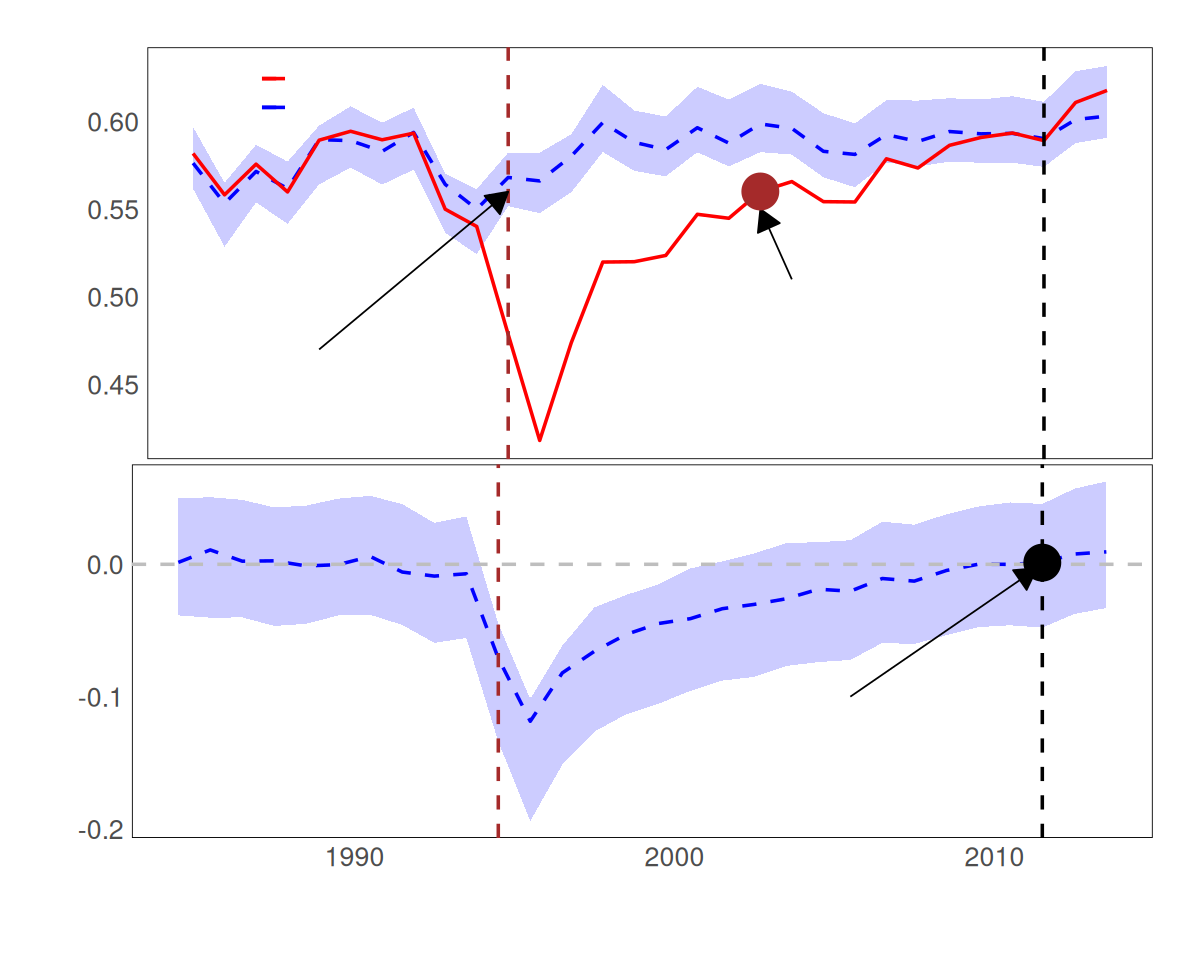

In [60]:
options(
  repr.plot.width = 10,     # Width of the plot
  repr.plot.height = 8    # Height of the plot
)
gg1 <- ggplot() +
  geom_line(aes(x = t, y = pred, color = "Prediction"), size = 1, linetype = "dashed") +
  geom_ribbon(aes(x = t, ymin = pred.lower, ymax = pred.upper, fill = "Prediction"), alpha = 0.2) +
  geom_line(aes(x = t, y = response, color = "Actual"), size = 1) +
  labs(
    x = "",
    y = ""
  ) +
  scale_color_manual(
    values = c("Prediction" = "blue", "Actual" = "red"),
    labels = c("",""),

  ) +
  scale_fill_manual(
    values = c("Prediction" = "blue"),
    guide = FALSE
  ) +
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = NA),
    # panel.background = element_rect(fill = "white"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text = element_text(size = 16),        # Font size for tick labels
    axis.text.x = element_blank(),
    axis.title = element_text(size = 22),
    legend.position = c(.13,.90),  # Move the legend to the bottom
    legend.background = element_rect(fill = "white", color = "black"),  # Legend background color and border
    legend.box = "horizontal",  # Arrange legend items horizontally,
    legend.text = element_text(size = 16,face="bold"),
    legend.title = element_blank(),
    plot.margin=unit(c(1,1,-0.5,1), "cm")
  ) 
  gg1 = gg1+theme(legend.background = element_blank())
  gg1 <- gg1 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1) +
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1) +
  geom_segment(
    aes(x = as.Date("1988-07-01"), xend = as.Date("1994-07-01"), y = .47, yend = .56),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) +
  # annotate("text", x = as.Date("1987-07-01"), y = .45, label = "Distrubance(1994)", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7,face="bold")+
  geom_segment(
  aes(x = as.Date("2003-07-01"), xend = as.Date("2002-07-01"), y = .51, yend = response[19]-0.01),
  arrow = arrow(type = "closed", length = unit(0.2, "inches")),
  lineend = "butt",
  color = "black"
  ) 
  # annotate("text", x = as.Date("2004-07-01"), y = .45, label = "Recovered to mean NDVI\n before disturbance (2002) ", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7)

  gg1 = gg1+geom_point(aes(x = as.Date("2002-07-01"), y = response[19]),color = "brown",
  show.legend = FALSE, size = 8,stroke=2)
   

gg2 <- ggplot() +
  geom_line(aes(x=t,y = point.effect), color = "blue", size = 1,linetype="dashed") +
  geom_ribbon(aes(t,ymin=point.effect.lower,ymax=point.effect.upper),fill="blue",alpha=0.2)+
  # geom_line(aes(x=t,y = response), color = "red", size = 1) +
  labs(
    x = "",
    y = ""
  ) + theme_minimal() + theme(panel.background = element_rect(fill = "white"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
  , axis.text = element_text(size = 16),        # Font size for tick labels
    axis.title = element_text(size = 22),plot.margin=unit(c(-.33,1,1,.8), "cm") )  # Remove gridlines
gg2 <- gg2 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1)+
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1)+
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray",size=1) + geom_point(aes(x = as.Date("2011-07-01"), y = point.effect[28]),color = "black",
  show.legend = FALSE, size = 8,stroke=2) +
  geom_segment(
    aes(x = as.Date("2005-07-01"), xend = as.Date("2011-05-01"), y = -0.1, yend = -.003),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) 
  # annotate("text", x = as.Date("2004-05-2"), y = -.16, label = "Recovered to counterfactual\n state(2011)", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7)


combined_plot <- grid.arrange(gg1, gg2, nrow = 2)
combined_plot
ggsave("../manuscript/figures/recovery.png", plot = combined_plot,width = 10, height = 8, dpi = 300)